In [2]:
#importo le librerie utili
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

boston = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data", sep="\s+",
                     names=["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PRATIO","B","LSTAT","MEDV"])
boston.head()

<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
/var/folders/wb/kbfflkgd24l9kfh0dvs2fsj40000gn/T/ipykernel_40696/2714108131.py:9: SyntaxWarning: invalid escape sequence '\s'
  boston = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data", sep="\s+",


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


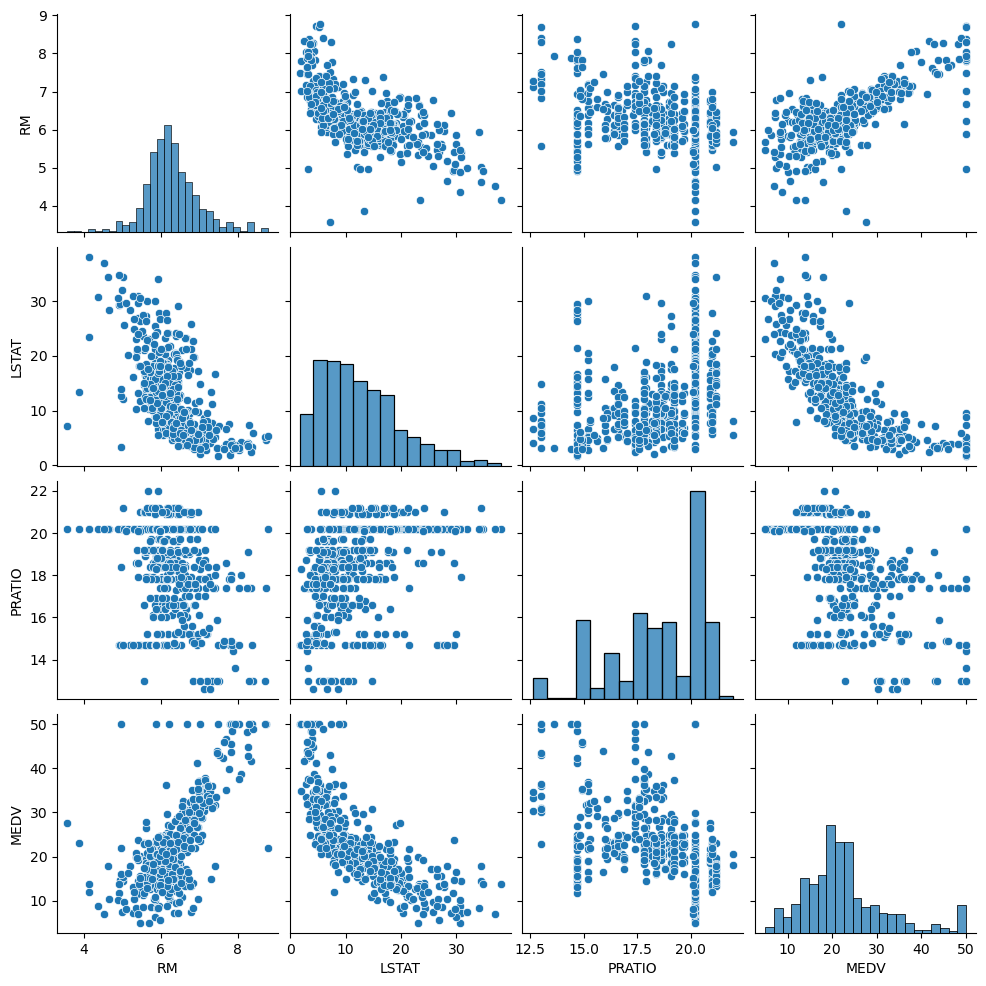

In [3]:
#le proprietà maggiormente correlate con il valore MEDV sono:
import seaborn as sns
cols = ["RM","LSTAT","PRATIO","MEDV"]
sns.pairplot(boston[cols])

In [6]:
#dal grafico sopra vedo che LSTAT e MEDV hanno una correlazione non lineare, sembra -x^2
X = boston[["LSTAT"]].values            #proprietà
Y = boston["MEDV"].values               #target

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

#creo una combinazione polinomiale
from sklearn.preprocessing import PolynomialFeatures
#eseguo la regressione all'interno di un ciclo for da 1 a 10
for i in range(1,11):
    polyfeats = PolynomialFeatures(degree=i)                #polinomio di i-esimo grado
    X_train_poly = polyfeats.fit_transform(X_train)
    X_test_poly = polyfeats.transform(X_test)
    lr = LinearRegression()
    lr.fit(X_train_poly, Y_train)
    Y_pred = lr.predict(X_test_poly)
    
    mse = mean_squared_error(Y_pred, Y_test)
    r2 = r2_score(Y_pred, Y_test)
    print("DEGREE: " +str(i)+ " MSE= " +str(mse) + " R2= " +str(r2))
    #il modello migliora fino al 4 grado e poi peggiora, sintomo di overfitting

DEGREE: 1 MSE= 39.81715050474416 R2= 0.194086380667445
DEGREE: 2 MSE= 33.60239474228587 R2= 0.33034014197086836
DEGREE: 3 MSE= 32.09167657344177 R2= 0.37052292720942537
DEGREE: 4 MSE= 29.843976067662346 R2= 0.41136828020365823
DEGREE: 5 MSE= 29.847013334095184 R2= 0.4109066416092688
DEGREE: 6 MSE= 29.548298228337888 R2= 0.4092392709875642
DEGREE: 7 MSE= 29.671711905390385 R2= 0.40936718274721995
DEGREE: 8 MSE= 31.82292832044459 R2= 0.41216900610267027
DEGREE: 9 MSE= 30.522920890034595 R2= 0.4187068168667921
DEGREE: 10 MSE= 34.62442611154396 R2= 0.3966847151610654


In [7]:
#provo a vedere come si comporta il modello inserendo tutte le propretà  ---> stesso codice di prima
X = boston.drop("MEDV", axis=1).values           #proprietà
Y = boston["MEDV"].values 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

#creo una combinazione polinomiale
from sklearn.preprocessing import PolynomialFeatures
#eseguo la regressione all'interno di un ciclo for da 1 a 4
for i in range(1,5):
    polyfeats = PolynomialFeatures(degree=i)                #polinomio di i-esimo grado
    X_train_poly = polyfeats.fit_transform(X_train)
    X_test_poly = polyfeats.transform(X_test)
    lr = LinearRegression()
    lr.fit(X_train_poly, Y_train)
    Y_pred = lr.predict(X_test_poly)
    
    mse = mean_squared_error(Y_pred, Y_test)
    r2 = r2_score(Y_pred, Y_test)
    print("DEGREE: " +str(i)+ " MSE= " +str(mse) + " R2= " +str(r2))
#ottiene un punteggio migliore perchè include tutte le proprietà 

DEGREE: 1 MSE= 27.195965766883162 R2= 0.5291006947760513
DEGREE: 2 MSE= 29.004173990059318 R2= 0.6992192230516203
DEGREE: 3 MSE= 85912.0770679282 R2= 0.0023915672352831097
DEGREE: 4 MSE= 546667.2171262685 R2= -0.004029495326714372
